# How to Calculate Magnetic Fields?




__Peter Dunne__

*Applied Magnetism - France*


# Today's Goal

- The aim of this tutorial is to show you how to calculate magnetic fields for some simple arrangements of magnets.
- It is _not_ a tutorial on Python or scientific computing.

## But First...


- How do we know which way to use the Gaussmeter?

- Which way is north?

![watch_compass](img/watch_compass.png)

- How do we know which way to use the Gaussmeter?

__Remember__: The north pole is a magnetic __south__ pole

- Align the probe vertically with the black spot facing you and pointing in a North-South direction
- Set the gaussmeter to the higher sensitivity
- Vary the offset so that it is nearly zero
- When you rotate the probe to have the black spot facing you or facing away from you the Gaussmeter will flip from 'S' to 'N'

## Assumptions


- Uniformly magnetised
- Only hard, permanent magnets, no soft magnetic material like pure iron
- Magnets are fully transparent to the magnetic fields
- We will consider only simple primitives: squares, cubes, cuboids, cylinders
- Only care about the magnetic field _outside_ the magnets 

## Approach using Python
Python is a high level, object-oriented interpreted language


__Pros__
- Simple to use
- Real-time check of values using the interpreter
- Large collection of useful libraries 


__Cons__
- Slow, much slower than compiled languages like C
- Diagnosing and fixing bugs can be difficult 
- Can be difficult to maintain large code bases


## This code
Feel free to look at the code afterwards. The design approach is as follows:

- We create a magnet object (square, cube, cylinder, etc....)
- Pass this object to a helper function that calculates the magnetic field 
- Plot the resulting data using matplotlib

This version is not optimised for speed or efficiency, but using numpy it is already fast enough.

## First Steps

Here we will install and import the modules we need

In [1]:
# Install the pymagnet module first

! python -m pip install pymagnet

In [2]:
import pymagnet as pm # Magnetic library for these excercises

import numpy as np # we use numpy for handing vectors and matrices
# from scipy.optimize import curve_fit # We will use the curve_fit function from scipy later

import matplotlib.pyplot as plt # Matplotlib is used to generate our plots

# Plotting backend, inline creates static figures, notebook creates dynamic ones
%matplotlib inline
# %matplotlib notebook

# This increases the resolution of plots displayed using the inline backend
%config InlineBackend.figure_format ='retina'

### Magnetic Field Above A Cylinder

![cylinder](img/cylinder.png)


The magnetic field directly above the centre is:
\begin{equation}
B_z = \frac{\mu_0 M_r}{2} \left[ \frac{z+L}{\sqrt{(z+L)^2 + R^2} } - \frac{z}{\sqrt{z^2 + R^2}} \right]
\end{equation}




Next we will call the reset function, this ensures there are no other magnet instances created in memory

In [3]:
pm.reset_magnets()

We define the magnet parameters, writing $ J_r = \mu_0 M_r $

In [4]:
radius = 5e-3
length = 20e-3
m_cyl = pm.magnets.Cylinder(radius = radius, length = length, Jr = 1.0, center =(0, 0 ,0))
m_cyl

Cylinder
J: 1.0 (T)
Size: [0.005 0.02 ] (m)
Center [0 0 0] (m)

And then plot

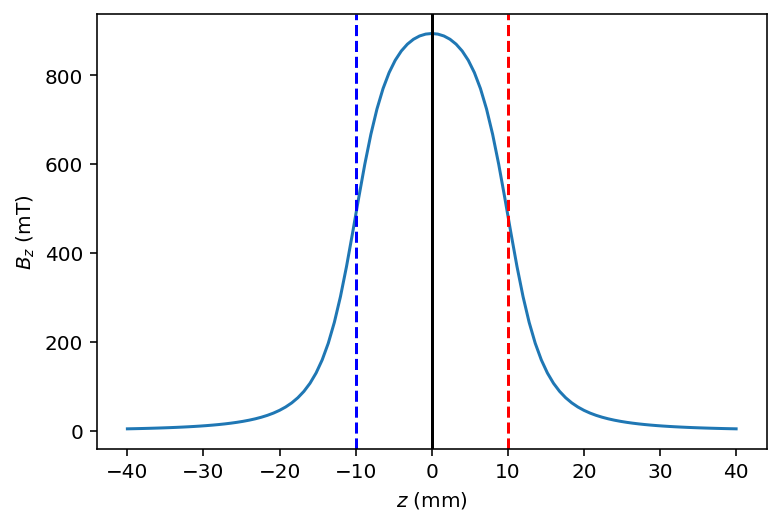

In [16]:
pm.plots.plot_1D_field(m_cyl);

### Magnetic Field Above A Cuboid
<!-- <img src="img/cuboid.png" height=40 /> -->
![cuboid](img/cuboid.png)


For a cuboid, the equation is a little bit more complicated:

\begin{equation}
B_z = \frac{\mu_0 M_r}{2}  {\left[ \tan^{-1}{\left(
\frac{(z+L)\sqrt{a^2 + b^2 + (z+L)^2} }{ab}
\right)} - \tan^{-1}{\left( \frac{z\sqrt{a^2 + b^2 + z^2} }{ab}
\right)}
\right]}
\end{equation}


In [6]:
width = 20e-3
m_cube = pm.magnets.Cube(width = width, Jr = 1, center=(0, 0, -width/2))
m_cube

Cube
J: [0. 0. 1.] (T)
Size: [0.04 0.04 0.04] (m)
Center [ 0.    0.   -0.01] (m)

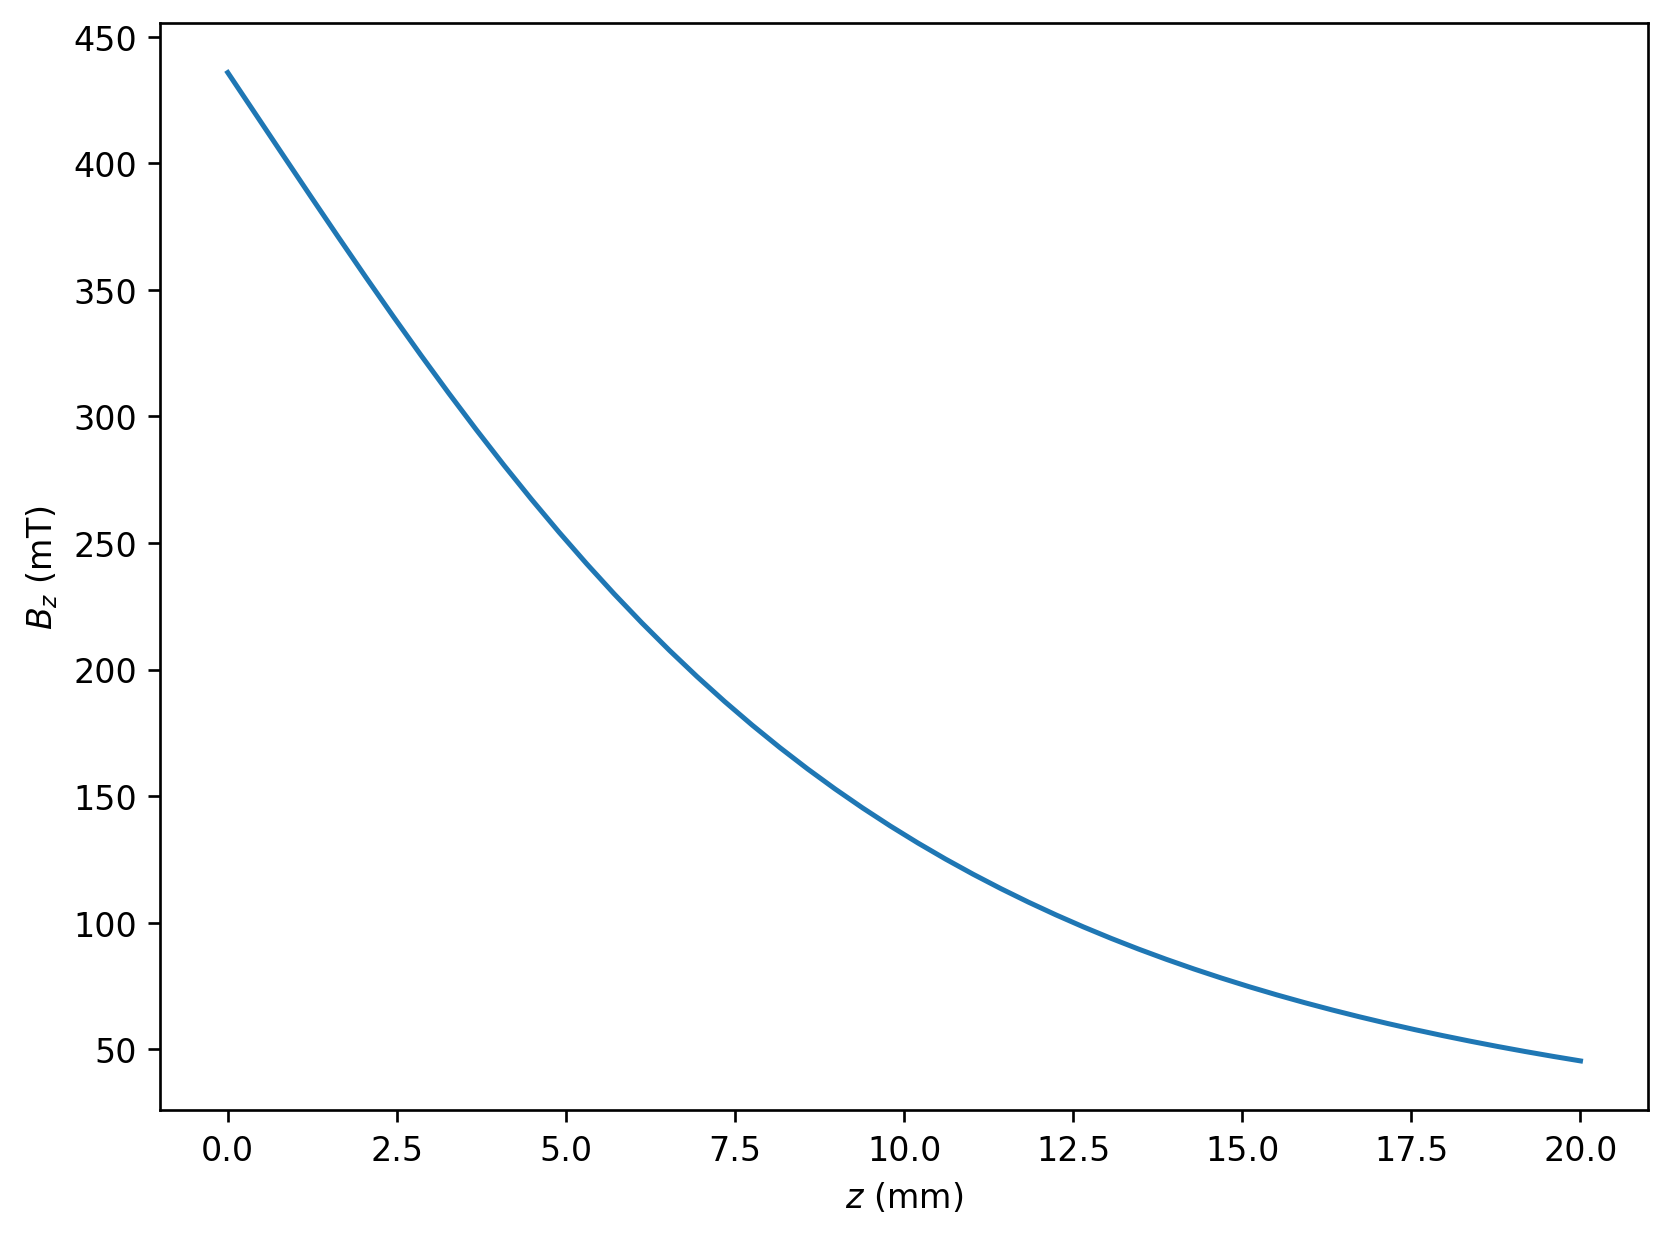

In [7]:
z = np.linspace(0, width)

Bz = pm.magnets.magnetic_field_prism_1D(m_cube, z)

fig, ax = plt.subplots(figsize=(8,6), dpi=120) #note figsize, dpi
plt.xlabel(r'$z$ (mm)')
plt.ylabel(r'$B_z$ (mT)')
plt.plot(z*1e3, Bz*1e3, label='Cube') # check z and Bz
plt.show()  

In [8]:
pm.list_magnets();

Cube
J: [0. 0. 1.] (T)
Size: [0.04 0.04 0.04] (m)
Center [ 0.    0.   -0.01] (m)

Cylinder
J: 1.0 (T)
Size: [0.005 0.02 ] (m)
Center [0 0 0] (m)



### Testing Configurations

Cuboid of size 10 x 20 x 40 mm$^3$


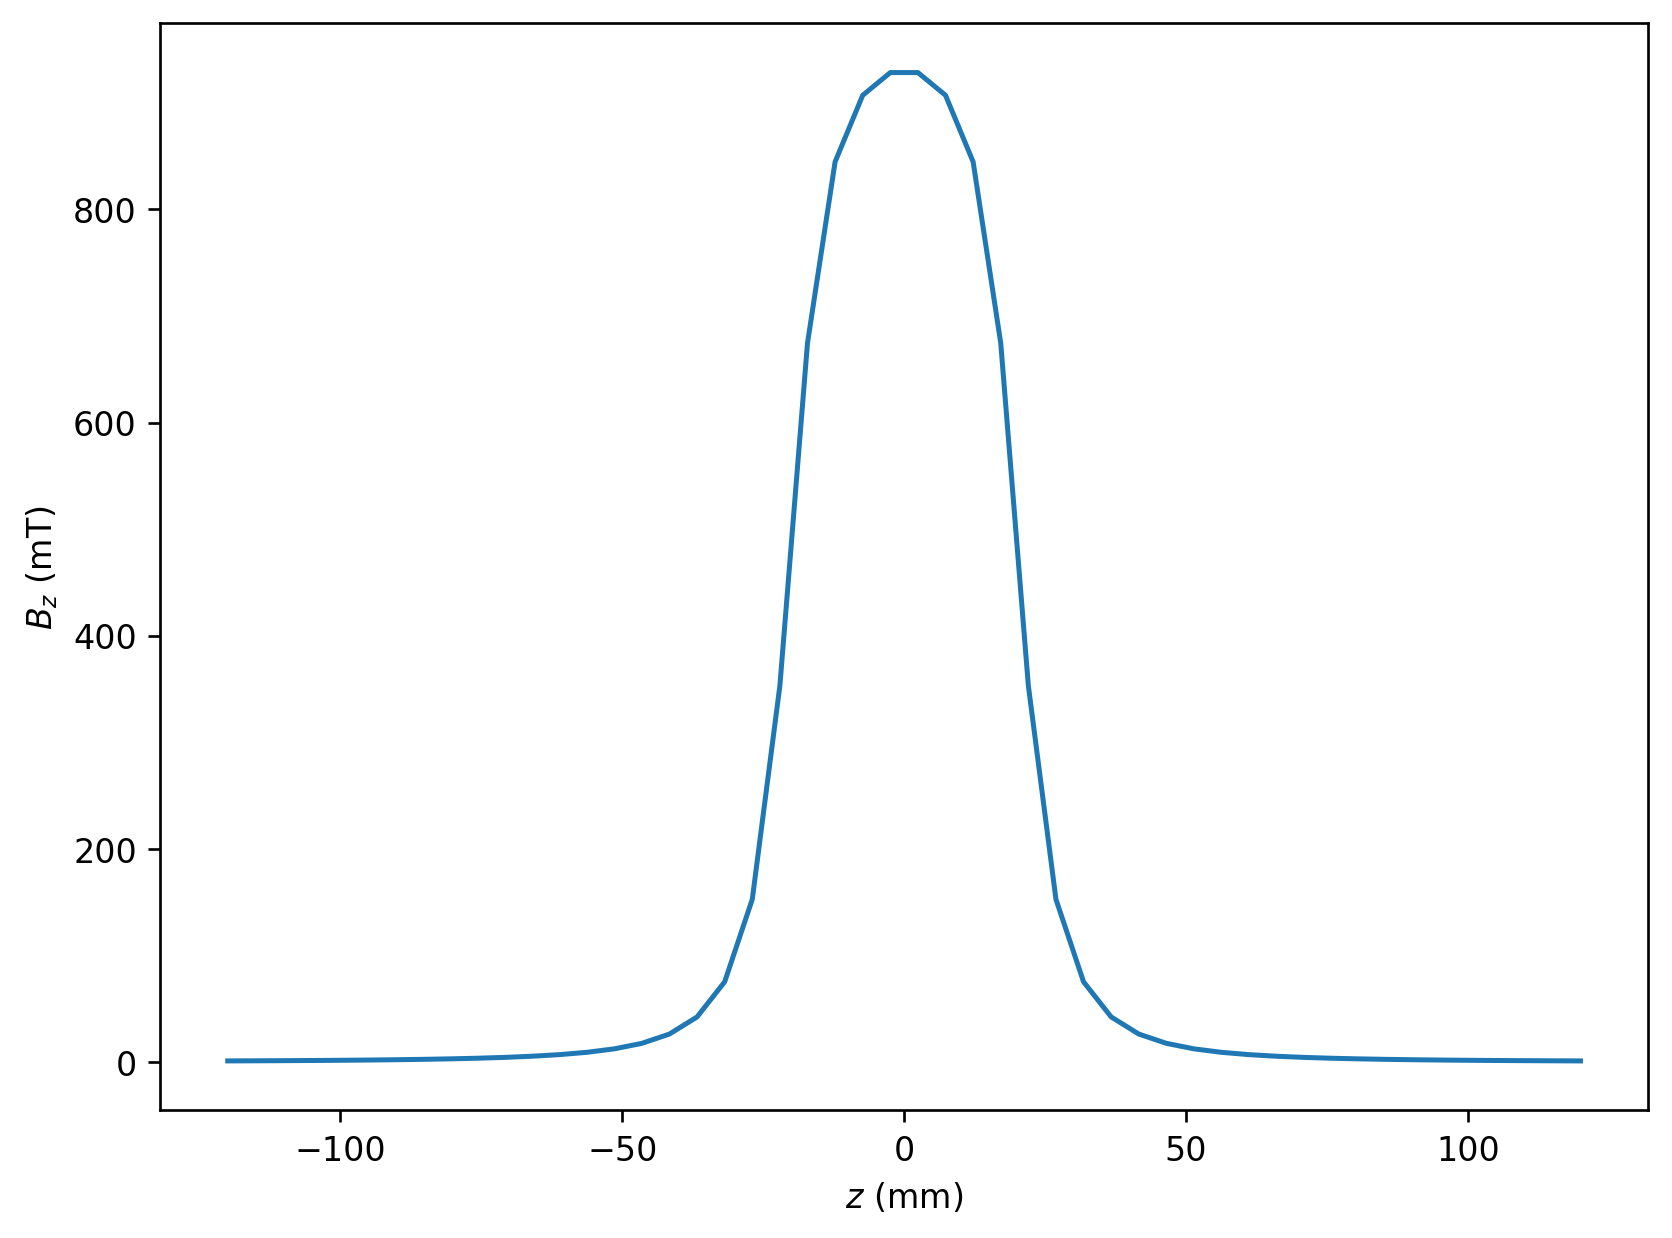

In [10]:
%matplotlib inline
pm.reset_magnets()

width = 10e-3
depth = 20e-3
height = 40e-3
center = (0, 0, 0)

m_prism = pm.magnets.Prism(width = width, depth = depth, height = height, Jr = 1.0, center = center)

z = np.linspace(-3*height, 3*height)
Bz = pm.magnets.magnetic_field_prism_1D(m_prism, z)

fig, ax = plt.subplots(figsize=(8,6), dpi=120)
plt.xlabel(r'$z$ (mm)')
plt.ylabel(r'$B_z$ (mT)')
plt.plot(z*1e3, Bz*1e3, label='Cube')
plt.show()

### Importance of R/L Ratio

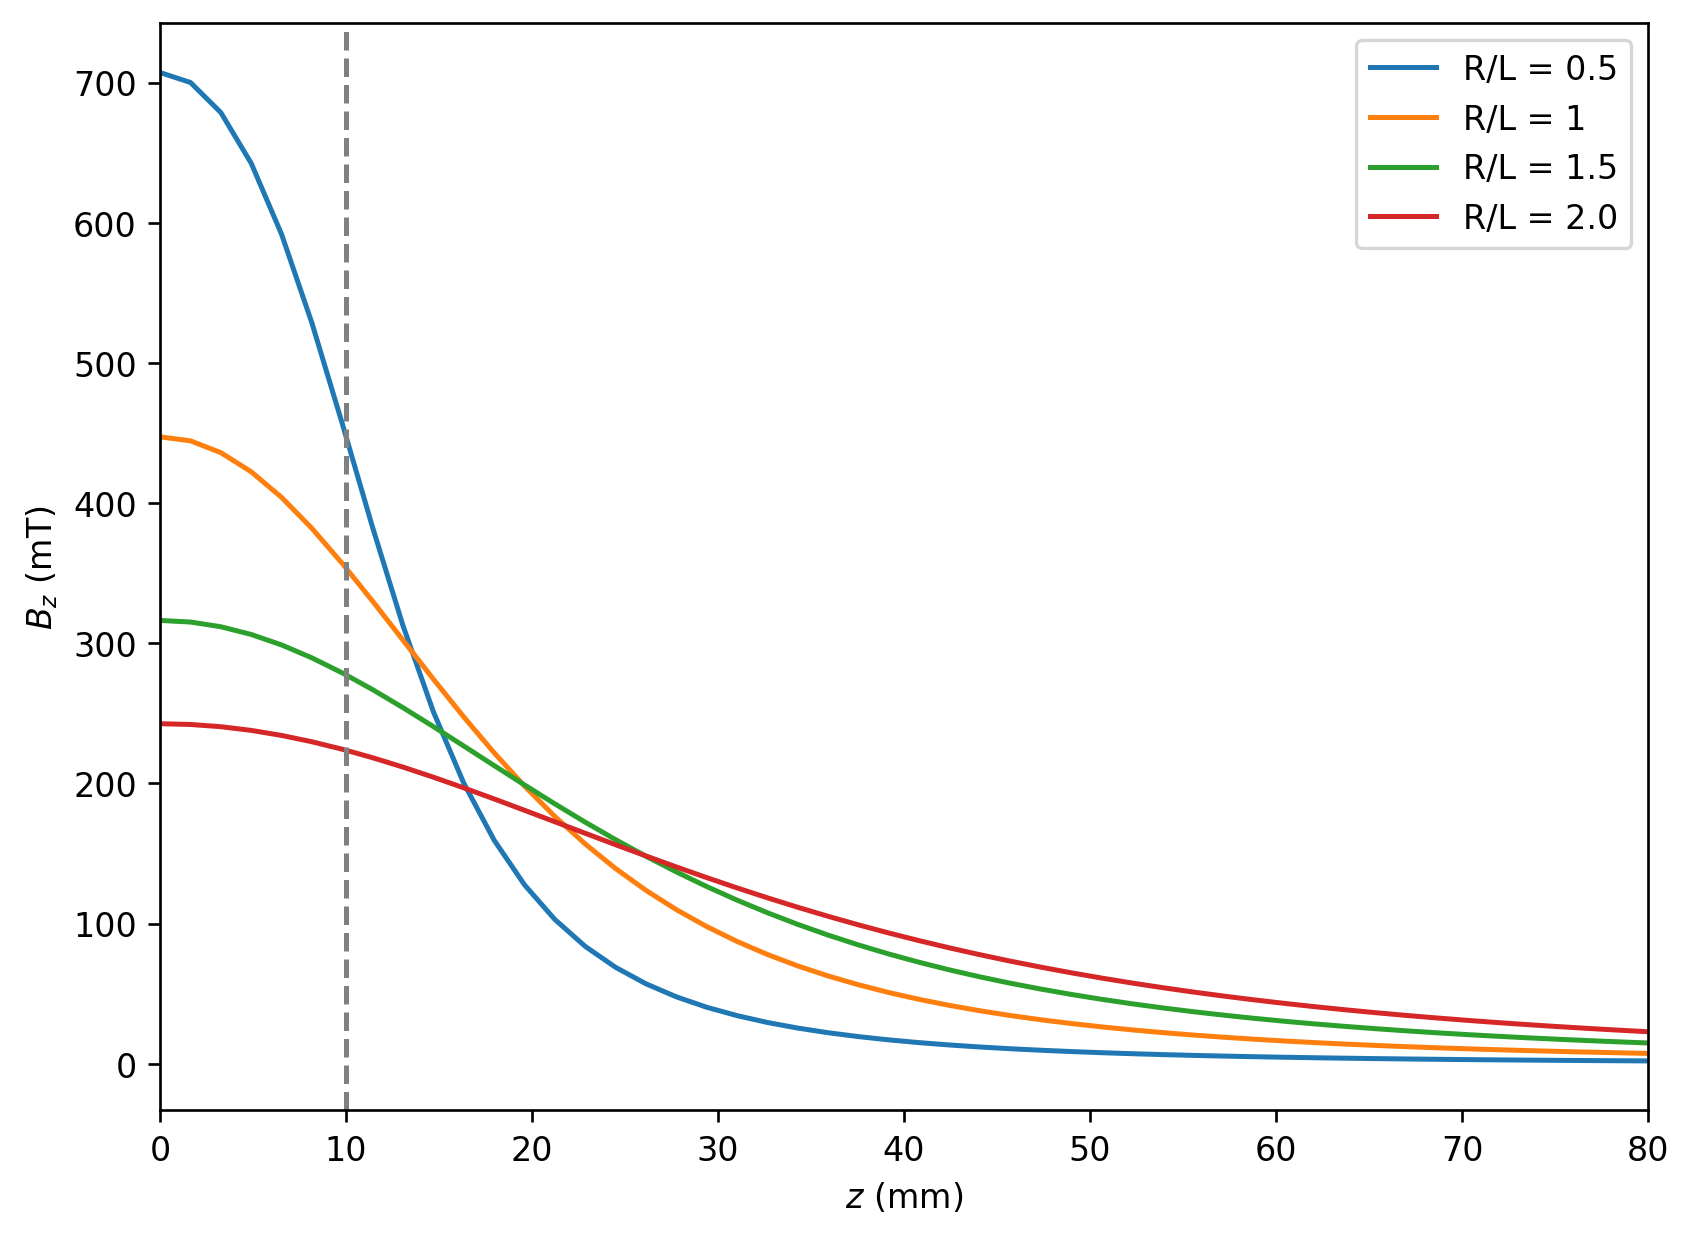

In [11]:
L = 20e-3
z = np.linspace(0, 4*L)

fig, ax = plt.subplots(figsize=(8,6), dpi=120)
plt.xlabel(r'$z$ (mm)') 
plt.ylabel(r'$B_z$ (mT)')

for val in [0.5, 1, 1.5, 2.0]:
    mag_temp = pm.magnets.Cylinder(radius=L*val, length = L)
    B_temp = pm.magnets.magnetic_field_cylinder_1D(mag_temp, z)
    plt.plot(z*1e3, B_temp*1e3, label=f'R/L = {val}')

plt.xlim([0, z.max()*1e3])
plt.axvline(x=L*1e3/2, c='gray', ls='--')
plt.legend(loc='best')
plt.show()

# Method of Images

![method_of_images](img/method_of_images.png)

- A sheet of soft ferromagnetic material acts as a mirror
- Doubles the effective length of a magnet

### Plotting the effect of Soft Iron

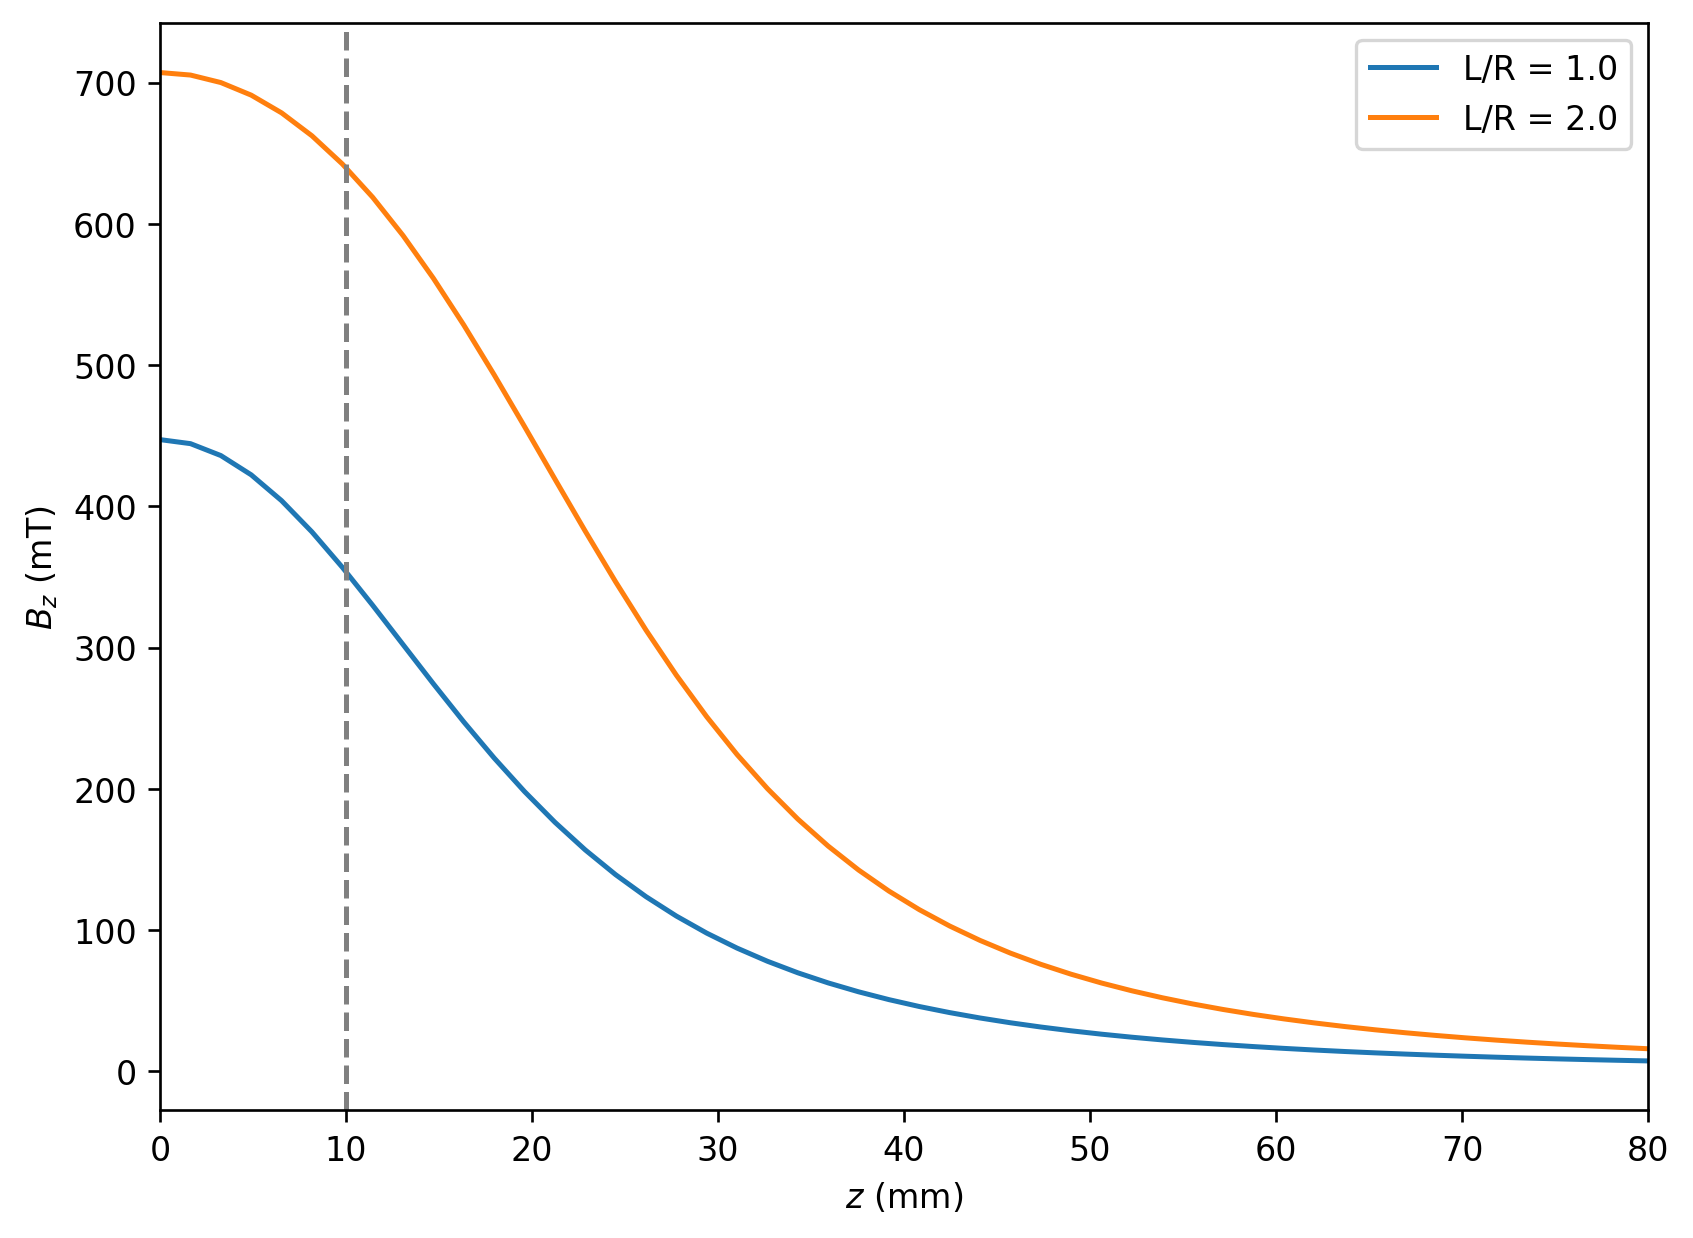

In [12]:
R = 20e-3
L = 20e-3
z = np.linspace(0, 4*L)

fig, ax = plt.subplots(figsize=(8,6), dpi=120)
plt.xlabel(r'$z$ (mm)')
plt.ylabel(r'$B_z$ (mT)')

for val in [1.0, 2.0]:
    mag_temp = pm.magnets.Cylinder(radius=R, length = val*R)
    B_temp = pm.magnets.magnetic_field_cylinder_1D(mag_temp, z)
    plt.plot(z*1e3, B_temp*1e3, label=f'L/R = {val}')

plt.xlim([0, z.max()*1e3])
plt.axvline(x=L*1e3/2, c='gray', ls='--')
plt.legend(loc='best')
plt.show()

# Measuring the remnant magnetisation of a magnet

By measuring the central field as a function of distance, we can fit this to the theoretical code to get $J_r$

\begin{equation}
B_z = \frac{\mu_0 M_r}{2} \left[ \frac{z+L}{\sqrt{(z+L)^2 + R^2} } - \frac{z}{\sqrt{z^2 + R^2}} \right]
\end{equation}

Example fit to previously recorded data
![measured_z_profile](img/measured_z_profile.png)

## Example fits:
![fit_examples](img/fit_examples.png)

## Measured $J_r$ Values
![table_magnets](img/table_magnets.png)

## Gradients and Forces
\begin{equation}
\mathbf{F_{\nabla B}} = \frac{1}{\mu_0} \chi \mathbf{B} \nabla \mathbf{B}
\end{equation}

Can also write it in terms of molar susceptibility $\chi_m$ and concentration $c$
\begin{equation}
\mathbf{F_{\nabla B}} = \frac{1}{\mu_0} \chi_m c  \mathbf{B} \nabla\mathbf{B}
\end{equation}

Only valid in linear, isotropic media. For Ferrofluids we need to use the Kelvin Force:
\begin{equation}
\mathbf{F} = \mu_0 \left( \mathbf{M} \cdot \nabla\right) \mathbf{H}
\end{equation}

Or the Helmholtz-Korteveg force (not shown here)

## Forces due to magnetic Charges

If we have two cylindrical magnets

![cylinder_force](img/cylinder_force.png)

The magnetic charge at each pole can be written as (assuming $R \ll L $)

\begin{equation}
Q_m = \pm M_s \pi R^2
\end{equation}

To make life easier, let's rewrite the charge as

\begin{equation}
K_m = \pm \mu_0 M_s \pi R^2 = \pm J_r \pi R^2
\end{equation}

\begin{equation}
F_{1,2}= \frac{\mu_0}{4\pi} \frac{Q_m(x_1) Q_m(x_2)}{(x_1 - x_2)^2}
\end{equation}


or

\begin{equation}
F_{1,2}= \frac{1}{4\pi \mu_0} \frac{K_m (x_1) K_m(x_2)}{(x_1 - x_2)^2}
\end{equation}


A charge representation of 
![charge_force](img/charge_force.png)

\begin{equation}
F_{1,2}= \frac{K_m^2}{4\pi\mu_0} \left[- \frac{1}{d^2} + \frac{2}{(L+d)^2} - \frac{1}{(2L + d)^2}  \right]
\end{equation}


## Force Between Cube Magnets
![force_cubes](img/force_cubes.png)

Two 1 cm cubes of Nd$_2$Fe$_{14}$ B, with a magnetisation $M = 1.2$ MA m$^{-1}$, are placed on a table with their moments directed along the line joining their centres.

If the separation of the centres is 10 cm, what force do the magnets exert on each other assuming a dipolar field  $B_x = {\mu_0 m }/{2\pi r^3}$, and where $m$ is magnetic moment?

Magnetic moment:
\begin{equation}
m = MV
\end{equation}

Force:
\begin{equation}
\mathbf{F} = \nabla \mathbf{m} \cdot \mathbf{B}
\end{equation}

Or in 1D
\begin{equation}
F_x = m \frac{dB_x}{dx}
\end{equation}

What is the moment?

$m = MV$

In [13]:
a = 0.01
V = a**3
M = 1.2e6
m = M * V

print(f'{m: .01f} A')


 1.2 A


\begin{equation}
F_x = m \frac{dB_x}{dx}
\end{equation}

\begin{equation}
\frac{dB_x}{dx} = \frac{3\mu_0 m}{2\pi x^4}
\end{equation}

\begin{equation}
F_x = \frac{3\mu_0 m}{2\pi x^4}
\end{equation}

In [14]:
x = 1e-2
def force(m,x):
    return 3*pm.u0*m**2/(2*np.pi*x**4)

print(f'{force(m,x): .01f} N')


 86.4 N


## Three Useful Books
![Furlani](img/Furlani.png)

![Abele](img/Abele.jpg)

![Mike](img/Mike.png)

## Any Questions?

### End of Part 1/3